## Ignore for now, 
We might use the function below in the second part of class. (I have intentionally made a small error)  

In [1]:
def sqrt(x):
    """
    custom sqrt function with error messages for invalid input
    """
    if type(x) not in [int,float]:
        raise TypeError("This function only works with numerical data types")
    elif x<0:
        raise ValueError("x must be nonnegative")
    else:
        return x**(1/2)  #small error missing parenthesis


# Broadcasting

In [6]:
import numpy as np

a=np.array([1,2,3])
b=np.array([4,5])

In [7]:
#this produces an error 
a+b

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

Indeed, adding arrays of different sizes feels "unnatural". But note that the error messae said

"ValueError: operands could not be broadcast together with shapes (3,) (2,)"

It didn't just say "shapes don't match."

Sometimes you can add arrays of different shapes and this is called broadcasting

In [8]:
a=np.ones(3)
b=np.zeros(3)
b=b.reshape(1,3)
a,b

(array([1., 1., 1.]), array([[0., 0., 0.]]))

In [9]:
a.shape, b.shape

((3,), (1, 3))

__First rule of broadcasting__ If the two arrays have different number of dimensions, take the array with fewer dimensions and pad it on __THE LEFT__ with extra ones

In this example, when call a+b, numpy automatically reshapes a into a (1,3) array. Now both arrays are 1 by 3 so you can add

In [11]:
a+b

array([[1., 1., 1.]])

In [12]:
#example 2
a=np.zeros((3,3))
b=np.arange(3)
print(a.shape,b.shape)
a,b

(3, 3) (3,)


(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([0, 1, 2]))

Let's try to add a and b. First we apply the first rule of broadcasting so now a has shape 3,3 and b will get 1,3.

__Second rule of broadcasting__ If there is the same number of dimensions you can "stretch out" out the ones 

inside the computer, there is a hidden variable new_b[i,j]=b[j]

axis 0 is where the one is, the i is the "silly variable" that doenst reallly do anything

so old_b was [0,1,2] and new_b is three copies of [0,1,2] stacked on top of each other


In [13]:
a+b

array([[0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.]])

__Third rule of broadcasting__

Sometimes your out of luck! If you have the same number of dimenions, and there is a disagreement, and neither is one, then you can't add.

__You can only stretch ones__

In [17]:
A=np.zeros((3,4))
B=np.zeros((6,2))
A+B

ValueError: operands could not be broadcast together with shapes (3,4) (6,2) 

__More Complicated Example__

In [18]:
a=np.arange(3)
a=a.reshape(1,3)
b=2*np.arange(3)
b=b.reshape(3,1)
print(a.shape,b.shape)
a,b

(1, 3) (3, 1)


(array([[0, 1, 2]]),
 array([[0],
        [2],
        [4]]))

Second rule of broadacasting says we can stretch out a along axis 0:
    
 a_new[i,j]=a[j]
 
a_new= array([[0,1,2]
             [0,1,2]
             [0,1,2]])
  
  b_new[i,j]=a[i]
  
  b_new=array([[0,0,0],
               [2,2,2],
               [4,4,4]])
  
  
  
   

In [27]:
x=np.linspace(0,1,101).reshape(101,1)
y=np.linspace(0,1,101).reshape(1,101)

In [30]:
z=x+y

In [32]:
np.sin(z)

array([[0.        , 0.00999983, 0.01999867, ..., 0.83049737, 0.83602598,
        0.84147098],
       [0.00999983, 0.01999867, 0.0299955 , ..., 0.83602598, 0.84147098,
        0.84683184],
       [0.01999867, 0.0299955 , 0.03998933, ..., 0.84147098, 0.84683184,
        0.85210802],
       ...,
       [0.83049737, 0.83602598, 0.84147098, ..., 0.92521152, 0.92137081,
        0.91743796],
       [0.83602598, 0.84147098, 0.84683184, ..., 0.92137081, 0.91743796,
        0.91341336],
       [0.84147098, 0.84683184, 0.85210802, ..., 0.91743796, 0.91341336,
        0.90929743]])

In [33]:
from matplotlib import pyplot as plt

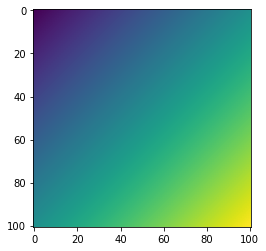

In [34]:
plt.imshow(z)

In [35]:
a=np.arange(3)

In [36]:
a+4

array([4, 5, 6])

# Normalizing a dataset 

In [37]:
X=np.random.rand(10,3)
X

array([[0.67949693, 0.59707628, 0.46389385],
       [0.36000192, 0.43913151, 0.16518449],
       [0.25827316, 0.7863631 , 0.39107343],
       [0.06149169, 0.80162574, 0.72383795],
       [0.92184443, 0.69152811, 0.8445579 ],
       [0.6736934 , 0.42688757, 0.69790193],
       [0.81393225, 0.19525046, 0.78078884],
       [0.58242756, 0.55908204, 0.52541498],
       [0.97736075, 0.98561311, 0.24356451],
       [0.12744616, 0.43923579, 0.2869568 ]])

Interpretation is every row is a different student, and each column is a different test

Let's make it so that every column has mean zero and variance one

In [38]:
# X was 10x3 
mu=X.mean(axis=0)
mu
#get rid of the ten and are left with something of size three

array([0.54559682, 0.59217937, 0.51231747])

Idea is to type X-mu
Shape of X: 10,3
Shape of mu: 3

What is the first thing that happens
mu become 1,3
X is still 10,3

So now what happens
mu now gets stretched out along axis 0 so it now has shape 10,3


In [41]:
Centered=X-mu

In [42]:
Centered.mean(axis=0)

array([ 1.33226763e-16, -3.33066907e-17, -2.22044605e-17])

In [43]:
sigma=X.std(axis=0)
sigma

array([0.31014333, 0.21887077, 0.22855557])

In [44]:
Normalized=(X-mu)/sigma

In [45]:
Normalized.mean(axis=0), Normalized.std(axis=0)

(array([ 3.77475828e-16, -1.22124533e-16, -1.11022302e-16]),
 array([1., 1., 1.]))

In [46]:
Normalized.mean(axis=1), Normalized.std(axis=1)

(array([ 0.08074723, -0.93883002, -0.18989815,  0.10716646,  1.04023628,
         0.15660314,  0.07543697,  0.0082803 ,  0.67127643, -1.01101865]),
 array([0.26597271, 0.41217057, 0.77859261, 1.17957659, 0.42606017,
        0.66499906, 1.34166291, 0.11553903, 1.31657878, 0.26573145]))

In [48]:
y=x+2

In [47]:
x=3

In [49]:
y

5